In [1]:
from __future__ import division
import numpy as np
import pandas as pd

import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
categories = {0: 'pelota', 1: 'perro', 2: 'taza', 3: 'tractor'}
#rcategories = {v: k for (k, v) in categories}
rcategories = {'pelota': 0, 'perro': 1, 'taza': 2, 'tractor': 3}

In [3]:
views1 = pd.read_csv('../data/results_1_view.csv')
views5 = pd.read_csv('../data/results_5_views.csv')
views10 = pd.read_csv('../data/results_10_views.csv')
views15 = pd.read_csv('../data/results_15_views.csv')
views20 = pd.read_csv('../data/results_20_views.csv')
data = pd.read_csv('../data/summary_data.csv')


In [4]:
FIELDS = ['RGB', 'PCloud', 'Combined']
VIEWS = [1, 10, 20]
#VIEWS = [1, 5, 10, 15, 20]
#results = (views1, views5, views10, views15, data)
results = (views1, views10, data)


In [5]:
for res in results:
    print res.describe()
    print "\n-------------------------------------------------------------------------\n"

            item  pred_combined   pred_rgb  pred_pcloud  entropy_rgb  \
count  89.000000      89.000000  89.000000    89.000000    89.000000   
mean   44.000000       1.157303   1.438202     0.741573     0.869677   
std    25.836021       0.497696   0.673442     0.574616     0.491294   
min     0.000000       0.000000   1.000000     0.000000    -0.000000   
25%    22.000000       1.000000   1.000000     0.000000     0.468996   
50%    44.000000       1.000000   1.000000     1.000000     0.948078   
75%    66.000000       1.000000   2.000000     1.000000     1.286693   
max    88.000000       3.000000   3.000000     2.000000     1.664853   

       entropy_pcloud  margin_rgb  margin_pcloud        jsd  
count       89.000000   82.000000      67.000000  89.000000  
mean         0.618434   14.378049      12.910448   0.405736  
std          0.407633    9.239796       7.751308   0.266147  
min         -0.000000    0.000000       0.000000   0.000000  
25%          0.210842    8.000000       7

In [6]:
for res in results:
    res.y = res.y.apply(lambda x: rcategories[x])

In [7]:
views10.ix[:, 1:3].T

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
y,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
pred_combined,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#  Metrics

## F1-Score and Accuracy

In [8]:
from sklearn.metrics import f1_score, accuracy_score

In [9]:
for res in results:
    print "Accuracy Combined: \t", accuracy_score(res.y, res.pred_combined)
    print "Accuracy RGB: \t\t", accuracy_score(res.y, res.pred_rgb)
    print "Accuracy PCloud: \t", accuracy_score(res.y, res.pred_pcloud)
    print "--------------------------------------\n"
    

Accuracy Combined: 	0.47191011236
Accuracy RGB: 		0.516853932584
Accuracy PCloud: 	0.247191011236
--------------------------------------

Accuracy Combined: 	0.373333333333
Accuracy RGB: 		0.36
Accuracy PCloud: 	0.44
--------------------------------------

Accuracy Combined: 	0.815789473684
Accuracy RGB: 		0.763157894737
Accuracy PCloud: 	0.289473684211
--------------------------------------



In [10]:
def get_metric(results, metric):
    rgb = []
    pcloud = []
    combined = []
    for res in results:
        rgb.append(metric(res.y, res.pred_rgb))
        pcloud.append(metric(res.y, res.pred_pcloud))
        combined.append(metric(res.y, res.pred_combined))
    return pd.DataFrame([rgb, pcloud, combined], index=FIELDS, columns=VIEWS)

def print_metric(results, metric, separator='\t'):
    for res in results:
        print metric.__name__, "Combined:", separator, metric(res.y, res.pred_combined)
        print metric.__name__, "RGB:", separator, metric(res.y, res.pred_rgb)
        print metric.__name__, "PCloud:t", separator, metric(res.y, res.pred_pcloud)
        print "--------------------------------------\n"
        

In [11]:
print_metric(results, f1_score)



f1_score Combined: 	0.375909083685
f1_score RGB: 	0.440498290181
f1_score PCloud:t 	0.238319342202
--------------------------------------

f1_score Combined: 	0.303701631702
f1_score RGB: 	0.296219336219
f1_score PCloud:t 	0.40562925599
--------------------------------------

f1_score Combined: 	0.82347015865
f1_score RGB: 	0.748269939138
f1_score PCloud:t 	0.256467741362
--------------------------------------



/Users/vgonpa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/vgonpa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".

In [12]:
f1s = get_metric(results, f1_score)
f1s

/Users/vgonpa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/vgonpa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".

,1,10,20
RGB,0.440498,0.296219,0.748270
PCloud,0.238319,0.405629,0.256468
Combined,0.375909,0.303702,0.823470


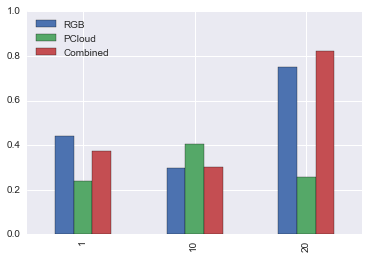

In [13]:
f1s.T.plot(kind='bar', ylim=(0,1))

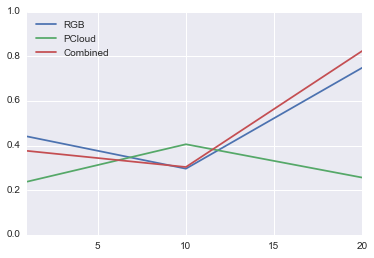

In [14]:
f1s.T.plot(ylim=(0,1))

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
print_metric(results, confusion_matrix, separator='\n')

confusion_matrix Combined: 
[[ 0 16  0  0]
 [ 0 30  3  0]
 [ 0  8 11  0]
 [ 4 14  2  1]]
confusion_matrix RGB: 
[[ 0 13  0  3]
 [ 0 29  4  0]
 [ 0  6 12  1]
 [ 0 11  5  5]]
confusion_matrix PCloud:t 
[[ 1 15  0  0]
 [18 15  0  0]
 [ 0 13  6  0]
 [10 11  0  0]]
--------------------------------------

confusion_matrix Combined: 
[[11  0  0  0]
 [29  0  0  0]
 [ 1  1 15  0]
 [13  2  1  2]]
confusion_matrix RGB: 
[[10  1  0  0]
 [29  0  0  0]
 [ 1  0 15  1]
 [15  0  1  2]]
confusion_matrix PCloud:t 
[[ 7  0  0  4]
 [ 6 13  8  2]
 [ 0  5 12  0]
 [ 1 14  2  1]]
--------------------------------------

confusion_matrix Combined: 
[[ 2  0  3  0]
 [ 0 15  0  0]
 [ 3  0  5  0]
 [ 1  0  0  9]]
confusion_matrix RGB: 
[[ 0  0  5  0]
 [ 0 15  0  0]
 [ 2  1  5  0]
 [ 1  0  0  9]]
confusion_matrix PCloud:t 
[[5 0 0 0]
 [1 4 2 8]
 [4 2 2 0]
 [2 8 0 0]]
--------------------------------------



In [17]:
cmat = confusion_matrix(data.y, data.pred_combined)
cmat

array([[ 2,  0,  3,  0],
       [ 0, 15,  0,  0],
       [ 3,  0,  5,  0],
       [ 1,  0,  0,  9]])

In [18]:
catnames = ['pelota', 'perro', 'taza', 'tractor']

In [19]:
pcm = pd.DataFrame(cmat, index=catnames, columns=catnames)
pcm

,pelota,perro,taza,tractor
pelota,2,0,3,0
perro,0,15,0,0
taza,3,0,5,0
tractor,1,0,0,9


##  Normalized Confusion Matrix

In [20]:
normalized = np.zeros([4,4])
for index, row in enumerate(cmat):
    normalized[index] = np.true_divide(row, sum(row))
normalized

array([[ 0.4  ,  0.   ,  0.6  ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.375,  0.   ,  0.625,  0.   ],
       [ 0.1  ,  0.   ,  0.   ,  0.9  ]])

In [21]:
cm_normalized = pd.DataFrame(normalized, index=catnames, columns=catnames)
cm_normalized = cm_normalized.apply(np.round, args=(2,))
cm_normalized

,pelota,perro,taza,tractor
pelota,0.40,0,0.60,0.0
perro,0.00,1,0.00,0.0
taza,0.38,0,0.62,0.0
tractor,0.10,0,0.00,0.9


In [22]:
cm_normalized.values.diagonal().mean()

0.72999999999999998

In [23]:
from sklearn.metrics import precision_score, recall_score

# JSD

In [24]:
jsds = pd.Series([res.jsd.mean() for res in results], index=VIEWS)
jsds.head()

1     0.405736
10    0.452959
20    0.467272
dtype: float64

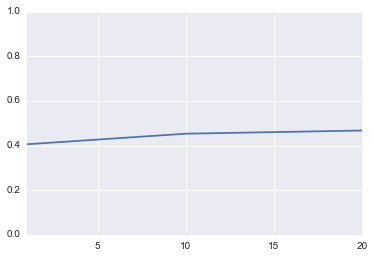

In [25]:
jsds.plot(ylim=(0,1))

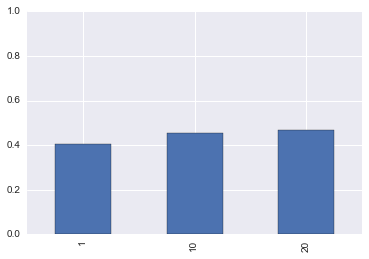

In [43]:
jsds.plot(kind='bar', ylim=(0,1), label='laalal')

# Entropy 

In [27]:
h_rgb = pd.Series([res.entropy_rgb.mean() for res in results], index=VIEWS)
h_pcloud = pd.Series([res.entropy_pcloud.mean() for res in results], index=VIEWS)

Hs = pd.DataFrame([h_rgb, h_pcloud], index=FIELDS[0:-1], columns=VIEWS)


In [28]:
Hs

,1,10,20
RGB,0.869677,0.550720,0.654488
PCloud,0.618434,1.195665,1.250784


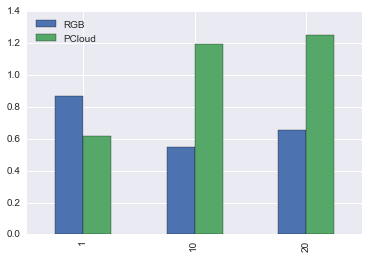

In [29]:
Hs.T.plot(kind='bar')

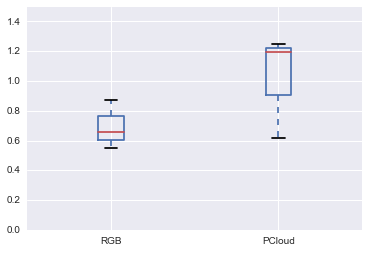

In [46]:
Hs.T.plot(kind='box', ylim=(0,1.5))

# Margin

In [30]:
m_rgb = pd.Series([res.margin_rgb.mean() for res in results], index=VIEWS)
m_pcloud = pd.Series([res.margin_pcloud.mean() for res in results], index=VIEWS)

Ms = pd.DataFrame([m_rgb, m_pcloud], index=FIELDS[0:-1], columns=VIEWS)

In [31]:
Ms

,1,10,20
RGB,14.378049,16.652174,16.571429
PCloud,12.910448,9.378378,8.823529


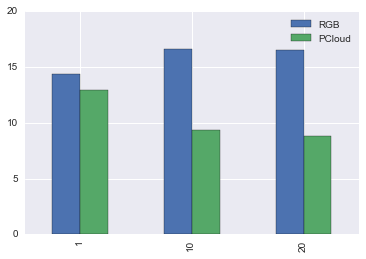

In [32]:
Ms.T.plot(kind='bar', ylim=(0, 20))

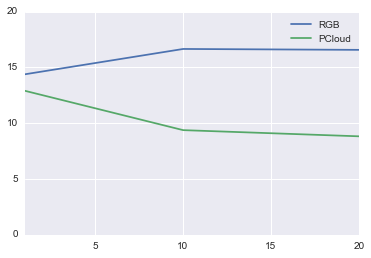

In [33]:
Ms.T.plot(ylim=(0,20))

In [35]:
Ms.T.to_latex()

u'\\begin{tabular}{lrr}\n\\toprule\n{} &        RGB &     PCloud \\\\\n\\midrule\n1  &  14.378049 &  12.910448 \\\\\n10 &  16.652174 &   9.378378 \\\\\n20 &  16.571429 &   8.823529 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Questions to user 

Num questions to user: [29, 30, 14]


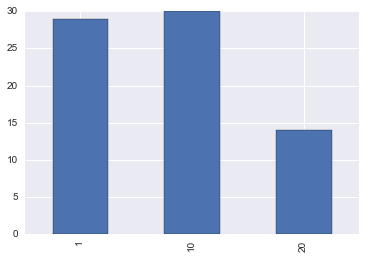

In [36]:
questions = [res.jsd[res.jsd > 0.5].count() for res in results]
print "Num questions to user: {}".format(questions)
num_questions = pd.Series(questions, index=VIEWS)
num_questions.plot(kind='bar')

Percentage of questions

In [37]:
lens = [len(res) for res in results]
print lens
pct_questions = pd.Series(num_questions/lens, index=VIEWS)
pct_questions

[89, 75, 38]


1     0.325843
10    0.400000
20    0.368421
dtype: float64

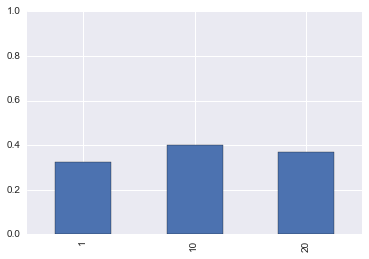

In [38]:
pct_questions.plot(kind='bar', ylim=(0,1))

In [ ]:
dd